# Customer segmentation through clustering

### Readme

#### *Data dictionary*
![alt text](https://drive.google.com/uc?id=1DPgO-PX7YMck0HS9O--wQOx4a-jfGFg6)

---

#### *Objectives*

###### The main objective of the project is to apply clustering techniques to identify different profiles of credit card holders.
######  Once the clusters have been obtained, it will be necessary to provide business strategies based on the characteristics of each cluster.
---

#### *Index*

```
Library

  0. Upload

  1. Exploratory analysis
    1.1 Distribution analysis
    1.2 Missing values
  
  2. Data preprocessing
    2.1 Handling missing values
    2.2 Normalize numeric column
    2.3 Correlation matrix

  3. Clustering
    3.1 Clustering : Preparation
    3.2 Clustering : Models
    3.2.1 First model with outliers (Balance,One-off purchases,Installment purchases)
    3.2.2 First model without outliers (Balance,One-off purchases,Installment purchases)
    3.2.3 Second model with outliers (Payments and Prc_Min_Payments)
    3.2.4 Second model without outliers (Payments and Prc_Min_Payments)
    3.2.5 Third model with outliers (Purchases frequency and Cash advance)
    3.2.6 Third model without outliers (Purchases frequency and Cash advance)
    

Conclusion
```






### Library

In [ ]:
## Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

## Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Setting
SEED=30
pd.set_option('display.float_format', '{:.4f}'.format)  # 4 digits

### 0. Dataset

In [ ]:
## Dataset
df=pd.read_csv("https://raw.githubusercontent.com/VincenzoPaternoster/Customer-segmentation-for-targeted-marketing-campaigns/refs/heads/main/data/credit_card_customers.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.9007,0.8182,95.4000,0.0000,95.4000,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,1000.0000,201.8021,139.5098,0.0000,12
1,C10002,3202.4674,0.9091,0.0000,0.0000,0.0000,6442.9455,0.0000,0.0000,0.0000,0.2500,4,0,7000.0000,4103.0326,1072.3402,0.2222,12
2,C10003,2495.1489,1.0000,773.1700,773.1700,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,7500.0000,622.0667,627.2848,0.0000,12
3,C10004,1666.6705,0.6364,1499.0000,1499.0000,0.0000,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,7500.0000,0.0000,NaN,0.0000,12
4,C10005,817.7143,1.0000,16.0000,16.0000,0.0000,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,1200.0000,678.3348,244.7912,0.0000,12


### 1. Exploratory analysis


#### 1.1 Distribution analysis

In [ ]:
## View basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8950.0000,8949.0000,8950.0000,8637.0000,8950.0000,8950.0000
mean,1564.4748,0.8773,1003.2048,592.4374,411.0676,978.8711,0.4904,0.2025,0.3644,0.1351,3.2488,14.7098,4494.4495,1733.1439,864.2065,0.1537,11.5173
std,2081.5319,0.2369,2136.6348,1659.8879,904.3381,2097.1639,0.4014,0.2983,0.3974,0.2001,6.8246,24.8576,3638.8157,2895.0638,2372.4466,0.2925,1.3383
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,50.0000,0.0000,0.0192,0.0000,6.0000
25%,128.2819,0.8889,39.6350,0.0000,0.0000,0.0000,0.0833,0.0000,0.0000,0.0000,0.0000,1.0000,1600.0000,383.2762,169.1237,0.0000,12.0000
50%,873.3852,1.0000,361.2800,38.0000,89.0000,0.0000,0.5000,0.0833,0.1667,0.0000,0.0000,7.0000,3000.0000,856.9015,312.3439,0.0000,12.0000
75%,2054.1400,1.0000,1110.1300,577.4050,468.6375,1113.8211,0.9167,0.3000,0.7500,0.2222,4.0000,17.0000,6500.0000,1901.1343,825.4855,0.1429,12.0000
max,19043.1386,1.0000,49039.5700,40761.2500,22500.0000,47137.2118,1.0000,1.0000,1.0000,1.5000,123.0000,358.0000,30000.0000,50721.4834,76406.2075,1.0000,12.0000


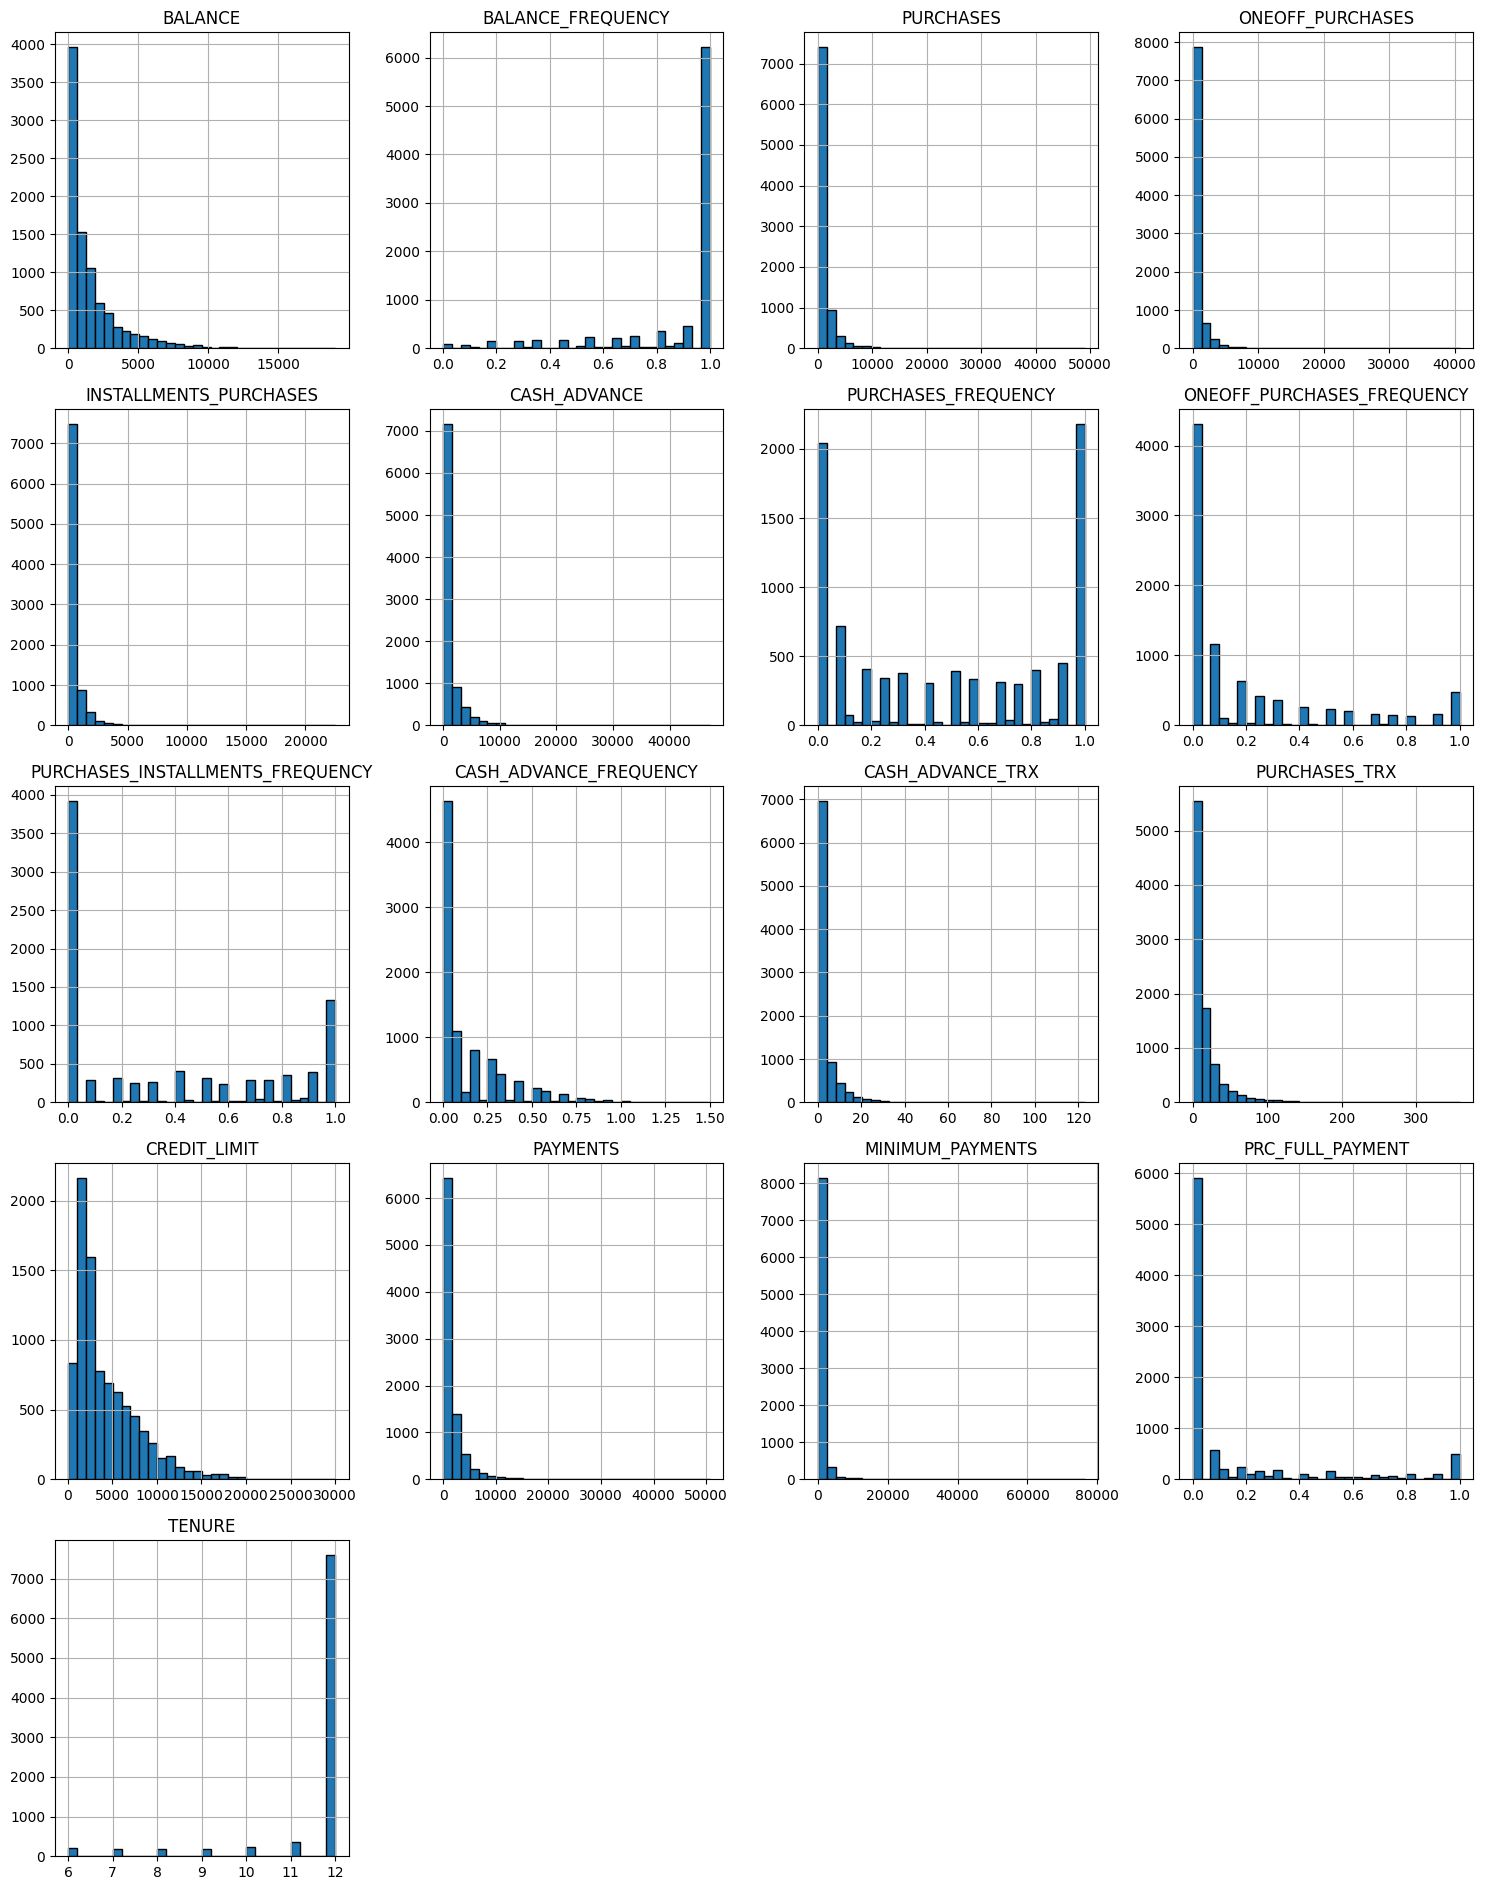

In [ ]:
## See distributions of numeric columns

df.hist(bins=30,figsize=(15,19),edgecolor="black")
plt.tight_layout()
plt.show()

### NOTE: 1) Cash advance frequency should have values from 0 to 1
###       2) Generally distributions are asymmetric (skewed)

In [ ]:
## CASH ADVANCE FREQUENCY column has values greater than 1
## Its values should be between 0 and 1

df[df["CASH_ADVANCE_FREQUENCY"]>1] # 8 values and 3 of them have also MINIMUM_PAYMENTS greater than PAYMENTS



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.0698,1.0000,362.3600,362.3600,0.0000,7240.4332,0.2500,0.2500,0.0000,1.2500,12,2,8000.0000,683.4215,2036.8776,0.0000,8
1626,C11680,2876.0093,1.0000,152.6100,152.6100,0.0000,3719.6502,0.3333,0.3333,0.0000,1.1667,24,2,4000.0000,248.3430,584.9263,0.0000,6
2555,C12629,5906.1849,1.0000,141.8000,141.8000,0.0000,1651.2869,0.1250,0.1250,0.0000,1.1250,12,2,10000.0000,933.9700,919.2897,0.0000,8
2608,C12684,7801.5115,1.0000,231.4000,231.4000,0.0000,4109.4652,0.1000,0.1000,0.0000,1.1000,20,3,13500.0000,1593.6177,1522.4968,0.0000,10
3038,C13127,3846.7425,1.0000,0.0000,0.0000,0.0000,1932.4607,0.0000,0.0000,0.0000,1.5000,18,0,5600.0000,496.2458,538.3469,0.0000,6
3253,C13347,5709.4865,0.8333,0.0000,0.0000,0.0000,2794.3263,0.0000,0.0000,0.0000,1.1667,10,0,6000.0000,550.5133,1299.4634,0.0000,6
8055,C18273,1917.8957,1.0000,285.0700,285.0700,0.0000,6084.8589,0.3636,0.3636,0.0000,1.0909,28,6,3000.0000,5692.6830,556.4496,0.0000,11
8365,C18588,3857.5622,1.0000,0.0000,0.0000,0.0000,2127.2138,0.0000,0.0000,0.0000,1.1429,26,0,5000.0000,617.5090,538.3969,0.0000,7


In [ ]:
## Exclude eight rows from analysis [681,1626,2555,2608,3038,3253,8055,8365]
df=df.drop(df[df["CASH_ADVANCE_FREQUENCY"]>1].index)

## Check
df[df["CASH_ADVANCE_FREQUENCY"]>1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


#### 1.2 Missing values

In [ ]:
### See wich columns have missing values
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


### 2) Preprocesing data

#### 2.1 Handling missing values

In [ ]:
### Replace NA in the columns MINIMUM_PAYMENTS and CREDIT_LIMIT with median
# (there are many outliers so I decided to use median)

## Use SimpleImputer() and replace NA with median
simp=SimpleImputer(strategy="median")
df[["MINIMUM_PAYMENTS","CREDIT_LIMIT"]]=simp.fit_transform(df[["MINIMUM_PAYMENTS","CREDIT_LIMIT"]])

## Check if there are another NA values
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
## There are observation with MINIMUM_PAYMENTS greater than PAYMENTS
## Perhaps this anomaly describes risky customer behavior or errors in the data set.

df_cl=df.drop(df[df["MINIMUM_PAYMENTS"]>df["PAYMENTS"]].index) # 2361 of 8942 rows
                                                               # (approximately 26% of observations)

## Since there are a large number of customer accounts with minimum payments higher than the payments,
## I decided to divide the dataset into two subsets (with and without these values)
## in order to apply the clustering technique to both


##### *NOTE*:

**I created new dataset without outliers in order to analyze both datasets with and without them**

#### 2.2 Normalize numeric columns

In [ ]:
## New columns for payment habits with outliers

## PRC_MIN_PAYMENTS is the percentage of minimum payments divided by all payments
## It might be helpful to understand customers' payment habits
## It can take values between 0 and 1

df["PRC_MIN_PAYMENTS"]=np.where(df["PAYMENTS"]!=0,df["MINIMUM_PAYMENTS"]/df["PAYMENTS"],0)
df[df["PRC_MIN_PAYMENTS"]>1] #There are 2393 with PRC_MIN_PAYMENTS greater than 1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PRC_MIN_PAYMENTS
2,C10003,2495.1489,1.0000,773.1700,773.1700,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,7500.0000,622.0667,627.2848,0.0000,12,1.0084
5,C10006,1809.8288,1.0000,1333.2800,0.0000,1333.2800,0.0000,0.6667,0.0000,0.5833,0.0000,0,8,1800.0000,1400.0578,2407.2460,0.0000,12,1.7194
10,C10011,1293.1249,1.0000,920.1200,0.0000,920.1200,0.0000,1.0000,0.0000,1.0000,0.0000,0,12,1200.0000,1083.3010,2172.6978,0.0000,12,2.0056
14,C10015,2772.7727,1.0000,0.0000,0.0000,0.0000,346.8114,0.0000,0.0000,0.0000,0.0833,1,0,3000.0000,805.6480,989.9629,0.0000,12,1.2288
15,C10016,6886.2132,1.0000,1611.7000,0.0000,1611.7000,2301.4913,0.5000,0.0000,0.5000,0.1667,4,11,8000.0000,1993.4393,2109.9065,0.0000,12,1.0584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,C19180,728.3525,1.0000,734.4000,734.4000,0.0000,239.8910,0.3333,0.3333,0.0000,0.1667,2,2,1000.0000,72.5300,110.9508,0.0000,6,1.5297
8946,C19187,19.1832,1.0000,300.0000,0.0000,300.0000,0.0000,1.0000,0.0000,0.8333,0.0000,0,6,1000.0000,275.8613,311.6372,0.0000,6,1.1297
8947,C19188,23.3987,0.8333,144.4000,0.0000,144.4000,0.0000,0.8333,0.0000,0.6667,0.0000,0,5,1000.0000,81.2708,82.4184,0.2500,6,1.0141
8948,C19189,13.4576,0.8333,0.0000,0.0000,0.0000,36.5588,0.0000,0.0000,0.0000,0.1667,2,0,500.0000,52.5500,55.7556,0.2500,6,1.0610


In [ ]:
# Normalization with outliers

# Since I already have columns with distribution of values ​​from 0 to 1 and
# since the values ​​do not respect a normal distribution, I decided to normalize the values, not using standardization

df_norm=['BALANCE','PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PRC_MIN_PAYMENTS']

mm=MinMaxScaler()
df[df_norm]=mm.fit_transform(df[df_norm])
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PRC_MIN_PAYMENTS
count,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000,8942.0000
mean,0.0820,0.8772,0.0205,0.0145,0.0183,0.0207,0.4907,0.2025,0.3648,0.1342,0.0263,0.0411,0.1483,0.0342,0.0111,0.1539,0.9201,0.0012
std,0.1092,0.2370,0.0436,0.0407,0.0402,0.0445,0.4014,0.2984,0.3975,0.1977,0.0554,0.0695,0.1215,0.0571,0.0305,0.2926,0.2222,0.0136
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0067,0.8889,0.0008,0.0000,0.0000,0.0000,0.0833,0.0000,0.0000,0.0000,0.0000,0.0028,0.0518,0.0076,0.0022,0.0000,1.0000,0.0001
50%,0.0458,1.0000,0.0074,0.0009,0.0040,0.0000,0.5000,0.0833,0.1667,0.0000,0.0000,0.0196,0.0985,0.0169,0.0041,0.0000,1.0000,0.0003
75%,0.1075,1.0000,0.0227,0.0142,0.0208,0.0236,0.9167,0.3000,0.7500,0.2222,0.0325,0.0475,0.2154,0.0375,0.0103,0.1429,1.0000,0.0008
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
## New colums for payments habit without outliers
## It can take values between 0 and 1
df_cl["PRC_MIN_PAYMENTS"]=np.where(df_cl["PAYMENTS"]!=0,df_cl["MINIMUM_PAYMENTS"]/df_cl["PAYMENTS"],0)

df_cl[df_cl["PRC_MIN_PAYMENTS"]>1] # without outliers there are not PRC_MIN_PAYMENTS greater than 1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PRC_MIN_PAYMENTS


In [ ]:
# Normalization without outliers
df_norm2=['BALANCE','PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PRC_MIN_PAYMENTS']

mm=MinMaxScaler()
df_cl[df_norm2]=mm.fit_transform(df_cl[df_norm2])
df_cl.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PRC_MIN_PAYMENTS
count,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000,6309.0000
mean,0.0651,0.8705,0.0246,0.0177,0.0217,0.0194,0.5439,0.2358,0.4054,0.1195,0.0238,0.0476,0.1560,0.0424,0.0255,0.2127,0.9355,0.3566
std,0.0967,0.2309,0.0494,0.0465,0.0443,0.0467,0.3963,0.3202,0.4018,0.1955,0.0576,0.0753,0.1250,0.0651,0.0406,0.3265,0.1979,0.2887
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0046,0.8182,0.0020,0.0000,0.0000,0.0000,0.0833,0.0000,0.0000,0.0000,0.0000,0.0028,0.0584,0.0104,0.0083,0.0000,1.0000,0.1182
50%,0.0272,1.0000,0.0098,0.0022,0.0073,0.0000,0.5833,0.0833,0.3333,0.0000,0.0000,0.0251,0.1152,0.0225,0.0116,0.0000,1.0000,0.2561
75%,0.0832,1.0000,0.0279,0.0187,0.0258,0.0194,1.0000,0.3333,0.8333,0.1667,0.0244,0.0587,0.2154,0.0477,0.0279,0.3000,1.0000,0.5570
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### 2.3 Correlation matrix

<Axes: >

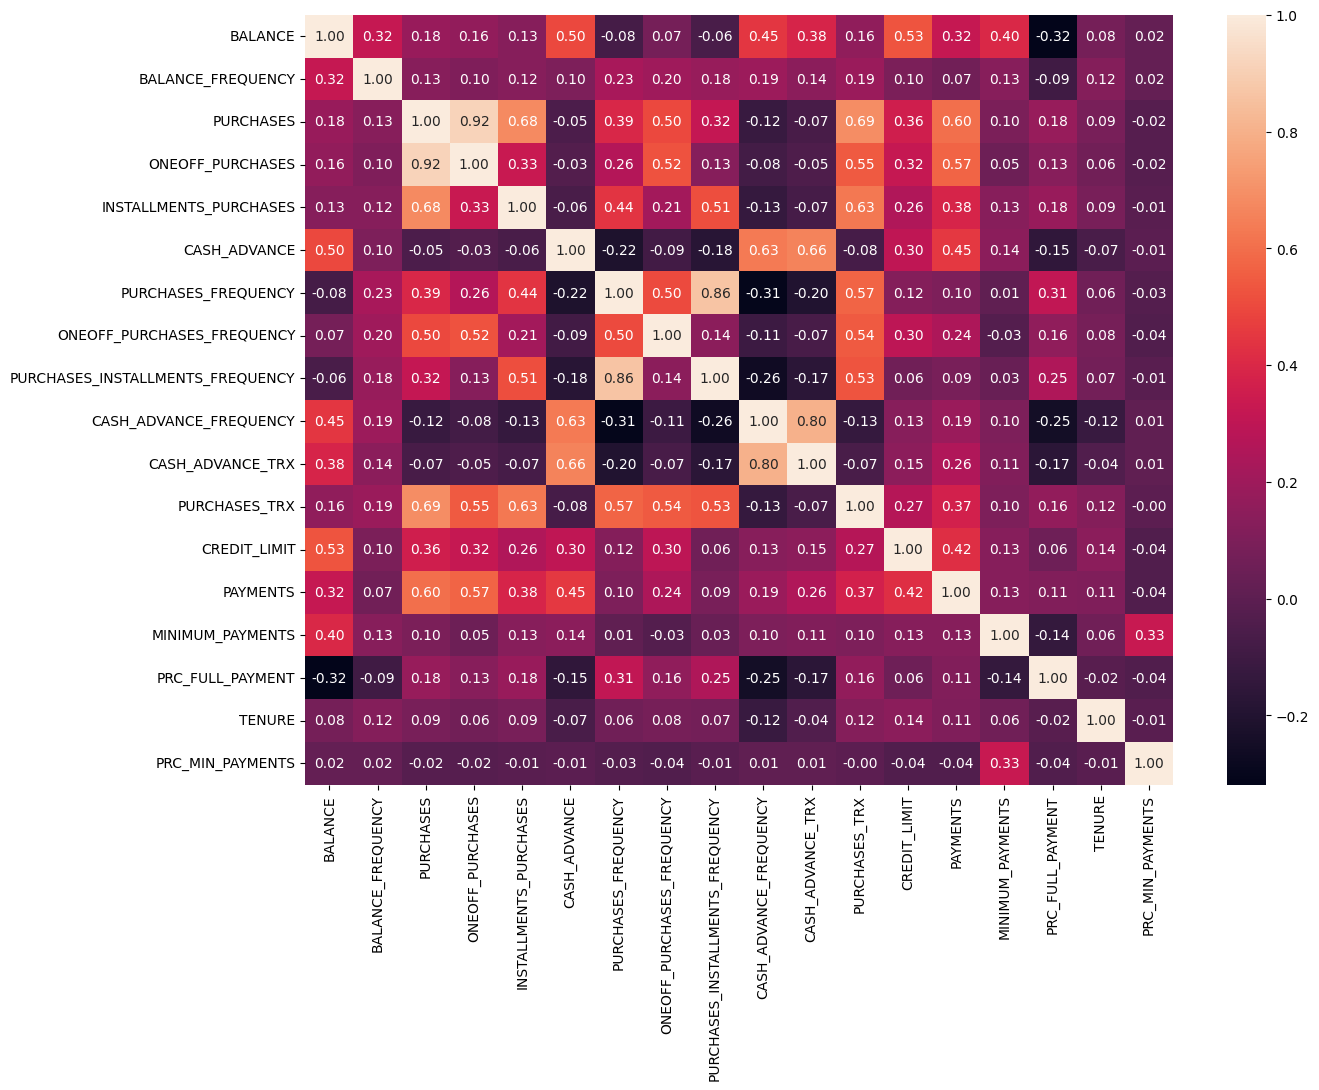

In [ ]:
## Correlation matrix (what features should I use?)

# Select feature to correlate
df_corr=df.drop("CUST_ID",axis=1)

# Create correlation matrix
plt.figure(figsize=(14,10))
sbn.heatmap(df_corr.corr(),
            annot=True,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            fmt=".2f")

# The correlation matrix shows usual correlations between BALANCE and all operations
# that increase balance (e.g. increasing purchases, payments and type of payments (e.g. cash advance))
# I will use feautures to define clusters about:

# 1) Average expenses : Balance,One-off purchases and Installment purchases
# 2) Payment habits : Payments and Prc_Min_Payments
# 3) Frequency of use : Purchases frequency and Cash advance

### 3) Clustering, interpretation and marketing strategies

#### 3.1 Clustering : Preparation

In [ ]:
### Define function to choose number of clusters to use

def how_many_clusters(X,title=False):

    # Get intertias and silhouettes
    inertias = []
    silhouettes = []

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=SEED).fit(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, kmeans.labels_))

    # Elbow method
    plt.plot(range(2, 11), inertias, marker='^')
    plt.xlabel("k")
    plt.ylabel("Inertia")

    if title:

      plt.title("Elbow Method with outliers")

    else:
      plt.title("Elbow Method without outliers")

    plt.show()

    # Silhouette score
    plt.plot(range(2, 11), silhouettes, marker='o', color='green')
    plt.xlabel("k")
    plt.ylabel("Score")

    if title:

      plt.title("Silhouette Score with outliers")

    else:
      plt.title("Silhouette Score without outliers")
    plt.show()


In [ ]:
# View clusters of model

# Function for view clusters

def view_clust(X,k,title=False):

    # X features
    # k number of clusters

    # KMeans
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=SEED).fit(X)
    centers=kmeans.cluster_centers_
    y_kmeans=kmeans.predict(X)

    # View clusters

    # 2 FEATURES
    if X.shape[1]==2:

      # Set labels of axes
      plt.xlabel(X.columns[0])
      plt.ylabel(X.columns[1])

      # Plot scatter
      sbn.scatterplot(x=X[X.columns[0]],y=X[X.columns[1]],hue=pd.Categorical(y_kmeans),s=100)
      plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.8,marker="*")

      # Write SSD value on chart
      plt.text(1.2,0,f"SSD: {kmeans.inertia_:.2f}",ha='right', va='bottom', transform=plt.gca().transAxes)

      # Set title of chart
      if title:

        plt.title(f"Scatterplot of {X.columns[0]} and {X.columns[1]} with outliers")

      else:

        plt.title(f"Scatterplot of {X.columns[0]} and {X.columns[1]} without outliers")

      plt.legend(title="Cluster")
      plt.show()

    # 3 FEATURES
    elif X.shape[1] == 3:

        fig = plt.figure(figsize=(18, 8))

        views = [(20, 45), (30, -60)]  # 3D Views: I decided to use two graphs for the same data because
                                       #           I noticed that only some clusters were visible, so I decided
                                       #           to plot two graphs with two different perspectives to
                                       #           improve the subsequent interpretation.

        # Use a loop to plot two different views of the same graph

        for i, (elev, azim) in enumerate(views, start=1): ## elev= moves the angle from the Y to the Z
                                                          ## azim= moves the angle from the X to the Y

            ax = fig.add_subplot(1, 2, i, projection='3d') ## Set 1 row, 2 columns and the number of charts
                                                           ## to display two charts side by side

            ax.view_init(elev=elev, azim=azim) # set elevation and azim in degrees instead of radians
                                               # makes it easier to move the angle
            # Set name of axes
            ax.set_xlabel(X.columns[0])
            ax.set_ylabel(X.columns[1])
            ax.set_zlabel(X.columns[2])

            # Assign labels for each cluster
            for cluster in np.unique(y_kmeans): ## For each unique cluster of y_kmeans

                labs = y_kmeans == cluster ## create boolean mask to understand which observations belong to the current cluster

                ax.scatter3D(X.loc[labs, X.columns[0]], # to filter for each column or feature the observations associated to each cluster
                             X.loc[labs, X.columns[1]],
                             X.loc[labs, X.columns[2]],
                             label=f"Cluster {cluster}", s=60, alpha=0.7)

            # Show centroids
            ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2],
                         c='black', s=200, alpha=0.8, marker="*")

            # Show SSD value
            ax.text2D(0.05, 0.95, f"SSD={kmeans.inertia_:.2f}", transform=ax.transAxes)

            # Set title
            title_text = f"Scatterplot of {X.columns[0]}, {X.columns[1]}, {X.columns[2]}"

            if title:
                title_text += " with outliers"

            else:
                title_text += " without outliers"

            ax.set_title(title_text)

        plt.legend(title="Cluster", loc='upper right')
        plt.tight_layout()
        plt.show()

    else:
      print("Unable to display chart with this number of dimensions")

In [ ]:
## Clustering models

# FIRST MODEL with outliers
avg_exp=df[["BALANCE","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]]

# FIRST MODEL without outliers
avg_exp2=df_cl[["BALANCE","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]]

# SECOND MODEL with outliers
habit_pay=df[["PAYMENTS","PRC_MIN_PAYMENTS"]]

# SECOND MODEL without outliers
habit_pay2=df_cl[["PAYMENTS","PRC_MIN_PAYMENTS"]]

# THIRD MODEL with outliers
freq_use=df[["CASH_ADVANCE","PURCHASES_FREQUENCY"]]

# THIRD MODEL without outliers
freq_use2=df_cl[["CASH_ADVANCE","PURCHASES_FREQUENCY"]]

#####

#### 3.2 Clustering : Models

#### **Note**

##### In the following lines of code, I decided to apply clustering to the dataset with outliers as well, because I want to show how these observations can influence cluster definition and subsequent marketing strategies.

##### 3.2.1 First model with outliers (Balance,One-off purchases,Installment purchases)

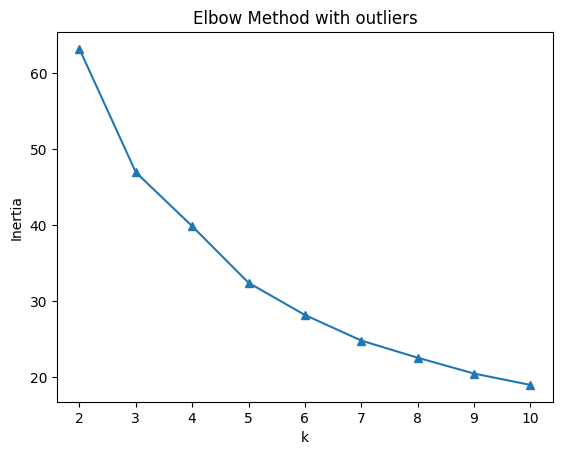

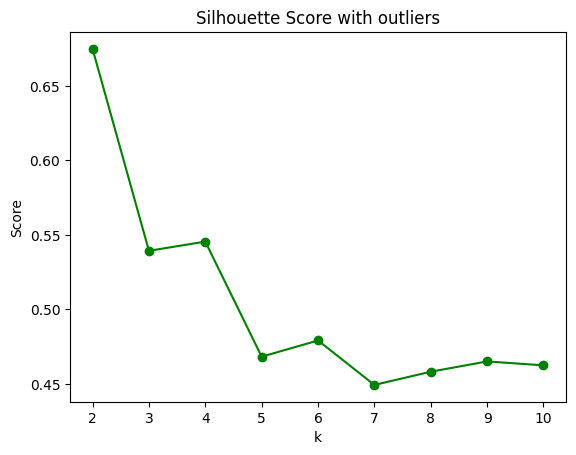

In [ ]:
## Number of clusters for the first model with outliers
how_many_clusters(avg_exp,True) ## k=4

# The elbow method suggests up to six/seven clusters, but the silhouette score is too low with six/seven.
# Therefore, the choice of four clusters represents the best compromise between the two methods.
# Although four clusters are not the optimal choice according to the elbow method alone.


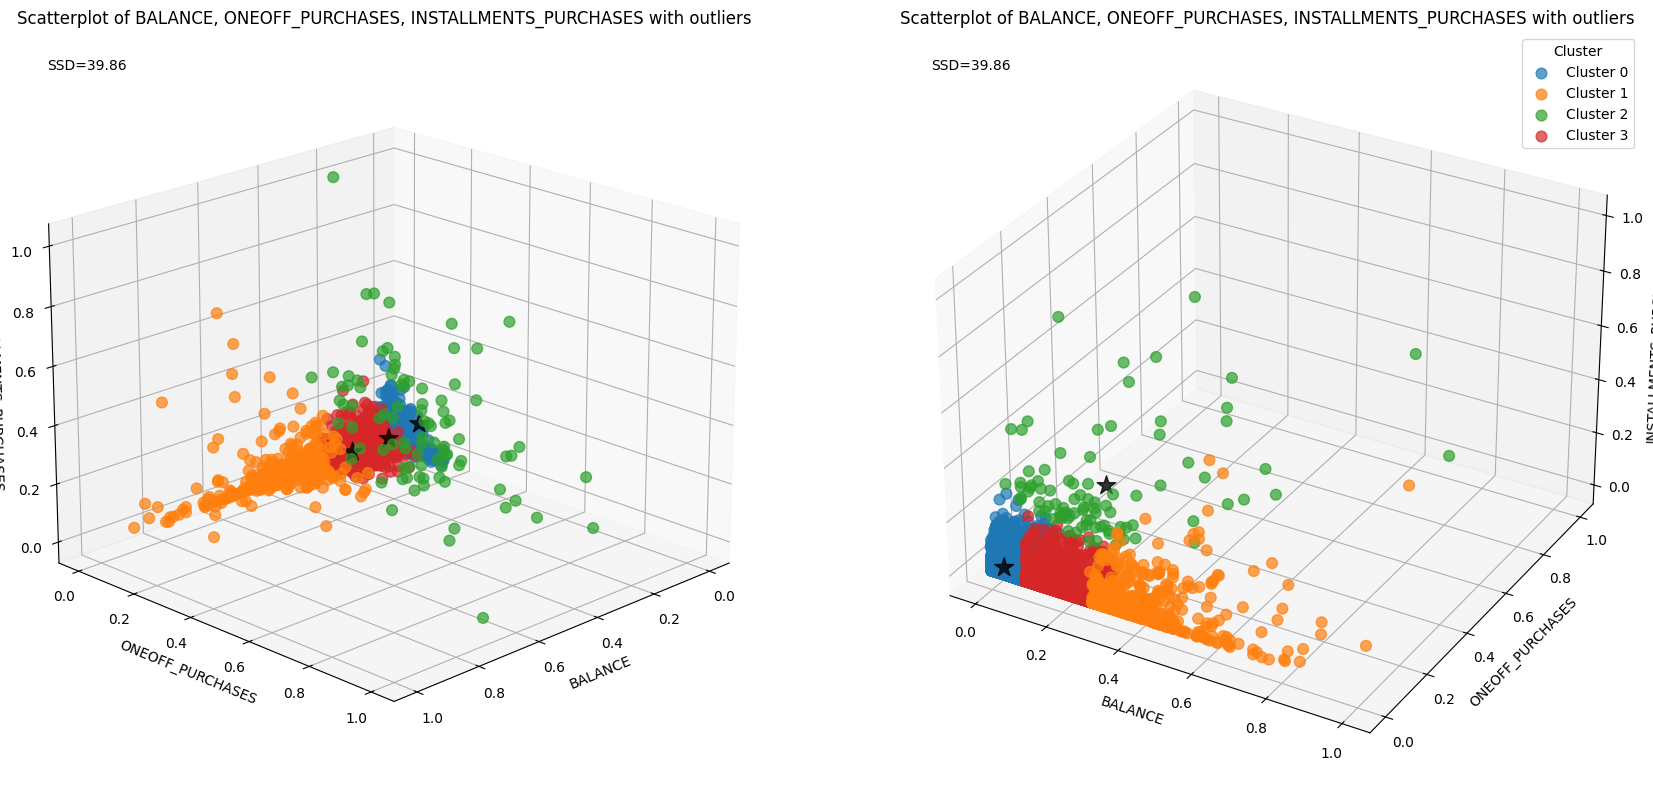

In [ ]:
## First clustering with outliers
view_clust(avg_exp,4,True)


##### Cluster interpretation and marketing strategies- First model (Average expenses) with outliers


    BALANCE: Residual balance on the purchase account
    ONEOFF_PURCHASES: Maximum amount for purchases in a single transaction
    INSTALLMENTS_PURCHASES: Amount of purchases made in installments

*There are four main clusters:*


*   Cluster 0: (**Single-payment - Low balance customers**)
    Customers with low balance, lower-to-medium one-off purchases and low installment purchases
    
    **STRATEGY**-> *These customers make fewer purchases, mostly paid in a single payment. We can offer special rewards for these customers with 2% cashback on the first five purchases to increase card usage**

*   Cluster 2: (**Single payment - Mixed balance customers**)
    Customers with mixed balance and with some customers who have high one-off purchases and installment payments

    **STRATEGY**-> *Customers with mixed profiles. This cluster could contain people with financial risk because maybe have difficult to settle the balance. So we can offer both financial education (e.g. remember the relevance to settle the balance) and refinancing offers*)
  
*   Cluster 3: (**Mixed payment - Low to medium balance customers** )
    Customers with low to medium balance and with medium installment purchases e low oneoff purchases.

    **STRATEGY**-> *A low or medium balance and medium purchases could  indicate the financial stability of the customers. We can offer a 2% cashback to increase card usage or we can propose an upgrade to a premium card to get rewards*

*   Cluster 1: (**Outliers-Extreme customers**)
    Customers with high balance and high installment purchases with low oneoff purchases.

    **STRATEGY**->*This is a group with unusual and risky financial behaviors. We can offer both financial education (for example, on the importance of managing balances and purchases and on a balanced approach) and refinancing offers to customers with a high balance*




##### 3.2.2 First model without outliers (Balance,One-off purchases,Installment purchases)

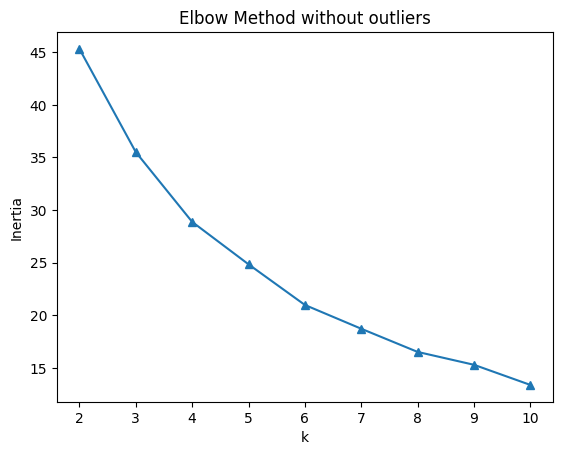

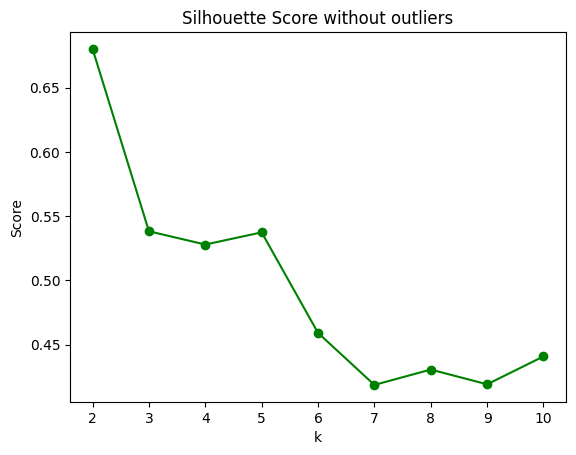

In [ ]:
## Number of clusters for the first model without outliers

how_many_clusters(avg_exp2,False)

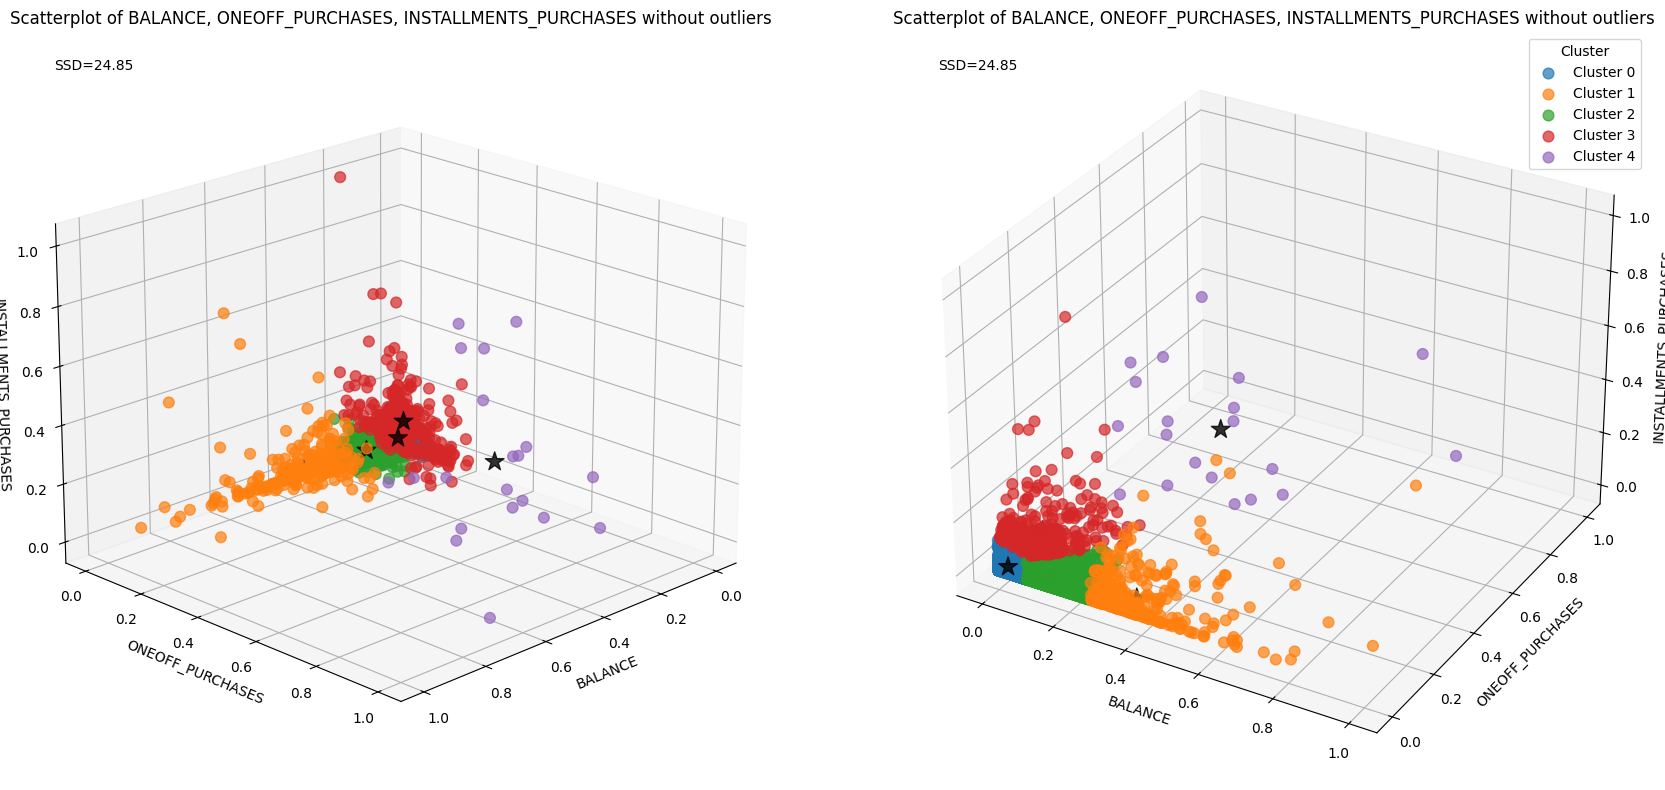

In [ ]:
## First clustering without outliers
view_clust(avg_exp2,5,False)

##### Cluster interpretation and marketing strategies- First model (Average expenses)


    BALANCE: Residual balance on the purchase account
    ONEOFF_PURCHASES: Maximum amount for purchases in a single transaction
    INSTALLMENTS_PURCHASES: Amount of purchases made in installments


*There are five main clusters:*


*   Cluster 0: (**Single-payment - Low balance customers**)
    Customers with low balance with both low one-off purchases and installment purchases
    
    **STRATEGY**-> *Small group of customers who makes fewer purchases, mostly paid in a single payment. We can offer special rewards for these customers with 2% cashback on the first five purchases to increase card usage**

*   Cluster 2: (**Mixed payments - Low to medium balance customers**)
    Customers with low to medium balance and with some customers who have medium installment payments and medium oneoff purchases

    **STRATEGY**-> *Customers with mixed payments and low to medium balance.
    They seem to be a responsible customers so we can offer special rewards for these customers with 2% cashback on the first five purchases (both installment and oneoff) to increase card usage

*   Cluster 3: (**Installment payments - Low balance customers** )
    Customers with low balance and with high installment purchases but with medium oneoff purchases.

    **STRATEGY**-> *A low balance and medium to high purchases could indicate the financial stability of the customers. We can offer an upgrade to a premium card to get rewards*

*   Cluster 1: (**Outliers-Extreme customers**)
    Customers with high balance and high installment purchases with low oneoff purchases.

    **STRATEGY**->*This is a group with unusual and risky financial behaviors. We can offer both financial education (for example, on the importance of managing balances and purchases and on a balanced approach) and refinancing offers to customers with a high balance*


* Cluster 4: (**Ambivalent customers**)  
    This cluster is composed by a small group of customers who tends to have from medium to high balance and also installment and oneoff purchases. Generally shows a financial risk behavior.

    **STRATEGY**-> As for cluster 1, *This is a group with unusual and risky financial behaviors. We can offer both financial education (for example, on the importance of managing balances and purchases and on a balanced approach) and refinancing offers to customers with a high balance*




##### 3.2.3 Clustering: Second model with outliers (Payments and Prc_Min_Payments)

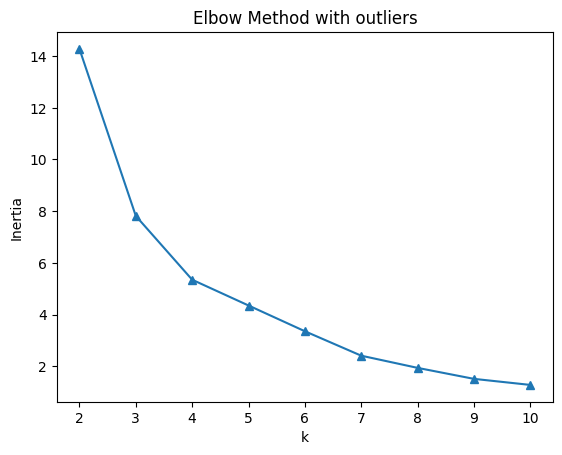

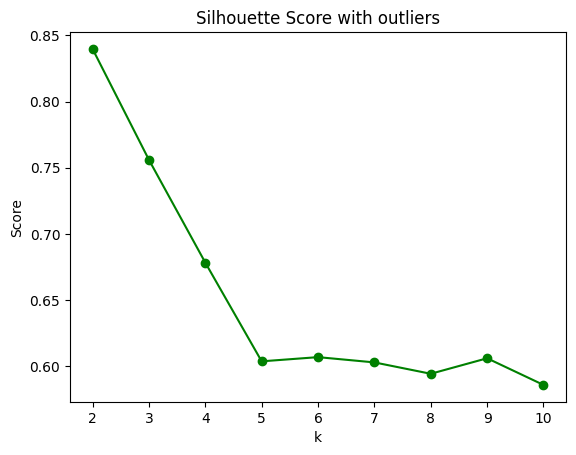

In [ ]:
## Number of clusters for the second clustering with outliers
how_many_clusters(habit_pay,True) ## k=5

## The best solution is 5 clusters
# Although 5 clusters are right after the elbow,
# the silhouette score for 5 clusters is good and looking at the
# arrangement of observations and clusters 5 seems optimal

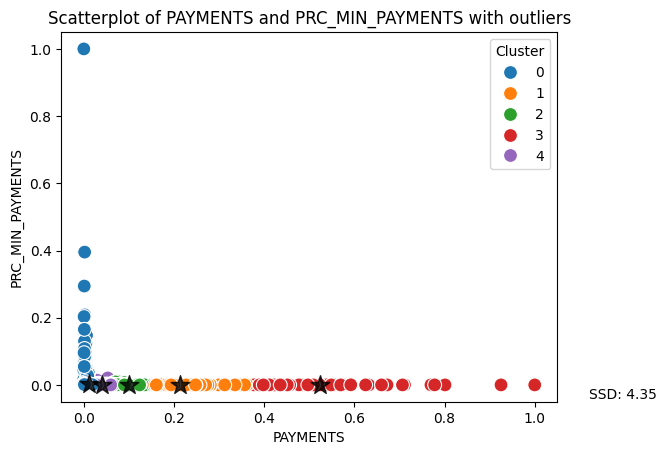

In [ ]:
## Second clustering with outliers

view_clust(habit_pay,5,True)



#### **Note**
----
##### In this graph, the outliers are completely different than the graph without outliers.This is because the minimum payment column has the most outliers in the dataset, and since

##### Since the output of the chart is clearly affected by outliers, I will interpret and suggest marketing strategies, only for charts without outliers (3.2.4)

##### 3.2.4 Second model without outliers (Payments and Prc_Min_Payments)

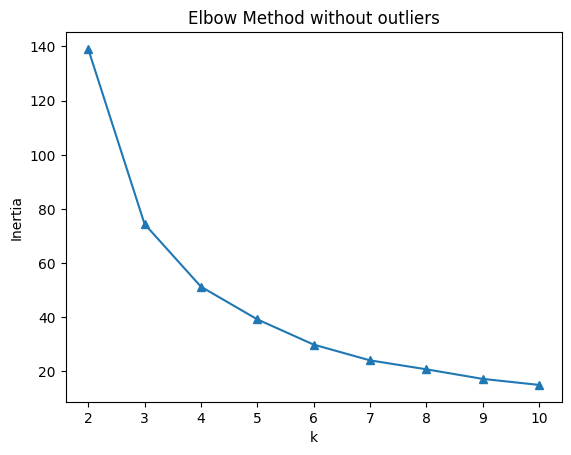

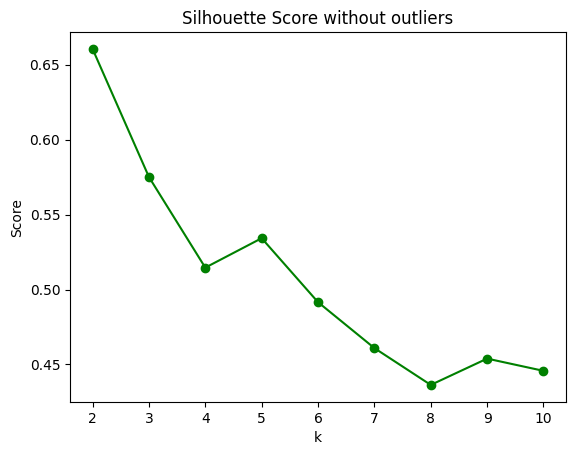

In [ ]:
## Number of clusters for the second clustering without outliers

how_many_clusters(habit_pay2,False)

## The elbow method suggests 6/7 clusters
## Instead silhouette score provide a good score ​​for 5 clusters
## I decided to use five clusters

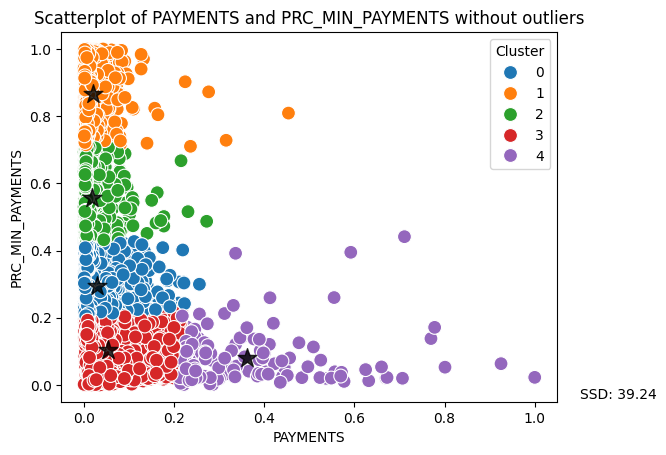

In [ ]:
## Second clustering without outliers

view_clust(habit_pay2,5,False)

## Unlike the previous graph, in this graph we can see how the outliers have influenced
## the results of previous work.
##Here we can see five well-defined clusters with all observations visible.

##### Cluster interpretation- Secoond model (Habitual payment) without outliers

    PRCMINPAYMENTS: Ratio between the minimum payment due and the total amount paid by the customer.
    PRCFULLPAYMENT: Ratio of full payment made by the customer.


  *There are five main clusters:*


- Cluster 0 (**Low to medium minimum payment and low pyament customers**): Customers who typically pay around 20–40% of their required minimum payment and with a low total payment amounts.

**STRATEGY**-> Since these customers show a future possible problematic trend about payment of minimum, we can offer newsletter to educaate them paying minimum with predictive notifications
  
- Cluster 1 (**Responsible customers**): Customers who always pay almost all minimum payment but with low general payments.

**STRATEGY**-> These customers already have a good habit of making minimum payments, but we could promote the increase of general payments, by paying the minimum payments in installments as long as customers increase their payments.
  
- Cluster 2 (The middle customers): Customers who have almost a good habit of making payments but with a low general payments.

**STRATEGY**-> Unlike cluster 1, it's better improve the customers' trend to pay all minimum payment with newsletter and notifications and than works with the minimum payments in installments.

- Cluster 3 (Default customers): Customers who tend to pay a small portion of the minimum payments and make few payments. This behavior could hide difficulties in paying debts (going into default)

**STRATEGY**->With these customers we have to avoid their default with personalized installments to promote all minimum payments

- Cluster 4 (Spenders customers): Customers with medium to high general payments but without habit of making minimum payments.

**STRATEGY**-> Since they tend to make a lot of payments, it is necessary to propose a targeted financial education

##### 3.2.5 Third model with outliers (Purchases frequency and Cash advance)

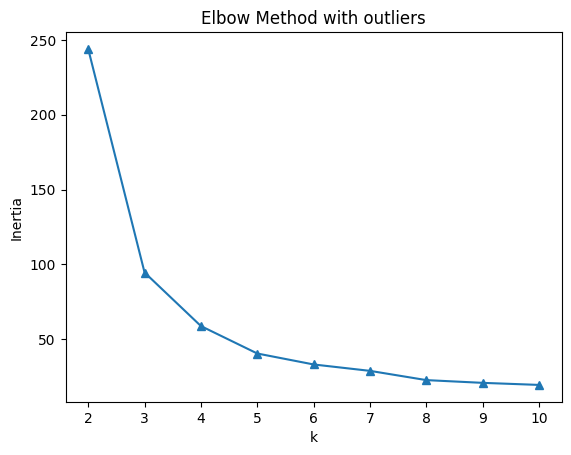

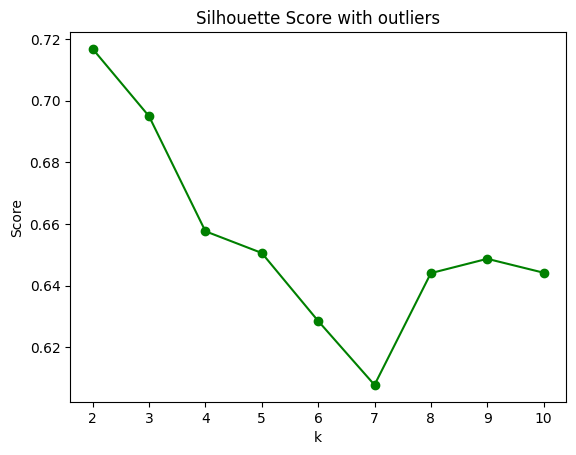

In [ ]:
## Number of clusters for the third model with outliers
how_many_clusters(freq_use,True) ## k=5


## The best solution is five clusters
#  The elbow method shows that 6/7 clusters are the best number of cluster but
#  the silhouette score tend to reduce for 6/7 clusters.
#  For this reason I decide to use 5 clusters

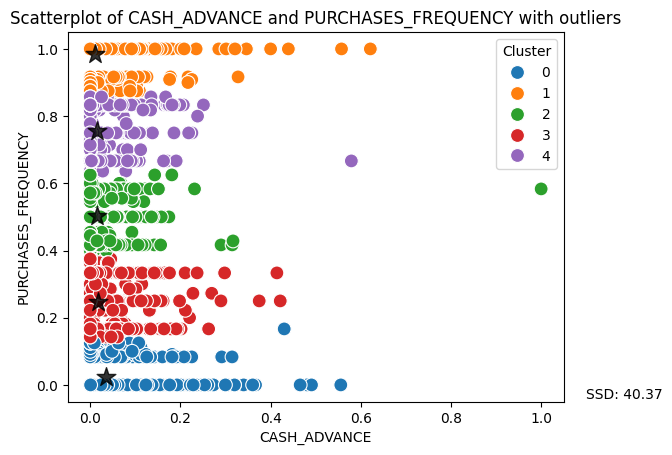

In [ ]:
## Third clustering with outliers
view_clust(freq_use,5,True)

##### Cluster interpretation- Third model (Frequency card usage) with outliers

    CASH_ADVANCE: Cash advance given by the customer.
    PURCHASES_FREQUENCY: Frequency of purchases (from 0 to 1)

  *There are five main clusters*

- Cluster 0 (**Low-usage cardholders**): Customers with low purchase frequency and low to medium cash advance usage.

**STRATEGY**-> They could be inactive customers or customers who are used to paying everything in cash. Since the fees for cash advances are higher than those for card payments, we could offer personalized offers to improve the frequency of purchases, using the card as cashback or similar strategies.

- Cluster 1 (**Frequent spenders**): Customers who make frequent purchases with moderate cash advance usage.

**STRATEGY**-> In this cluster there are both low and moderate cash advance customers for this reason we can offer an upgrade of the card for those customers who have high card usage and low cash advance while for others we can promote personalized offers to reduce cash advance

- Cluster 2 (**Medium customers**): Customers who make an average number of card purchases and few cash withdrawals.

**STRATEGY**-> Improve purchases frequency with cashback strategies


- Cluster 3 (**Conservative customers**): Customers who have low purchases and low to medium cash advance.

**STRATEGY**-> Propose offers for using the card more frequently with high rewards for the first 3 months (e.g cashback)

- Cluster 4 (**Responsible customers**): Customers who have high purchases frequency and low cash advance.

**STRATEGY**-> Propose offers for using the card more frequently with small rewards (e.g cashback)

##### 3.2.6 Third model without outliers (Purchases frequency and cash advance)

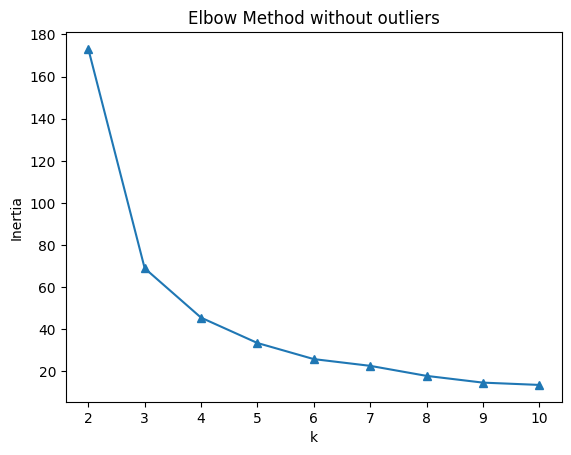

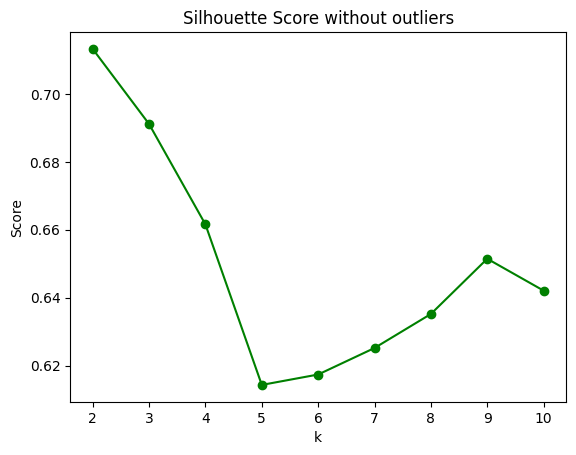

In [ ]:
## Number of clusters for the third model without outliers

how_many_clusters(freq_use2,False)

# The elbow method shows that 6/7 clusters is the best solution but
# silhouette score shows a low value from 5 to 8 values compared to 4.
# Since the goal of the project is clustering I think that is useless put too many clusters
# for the segmentation.
# For this reason I decide to use 5 clusters

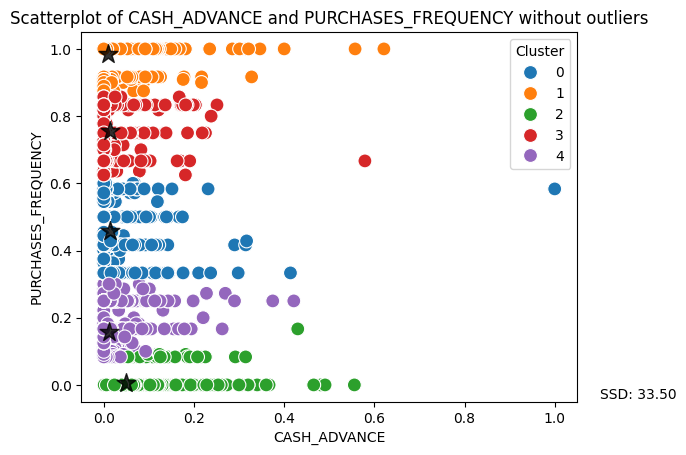

In [ ]:
## Third clustering without outliers
view_clust(freq_use2,5,False)

##### Cluster interpretation- Third model (Frequency card usage) without outliers

     CASH_ADVANCE: Cash advance given by the customer.
     PURCHASES_FREQUENCY: Frequency of purchases (from 0 to 1)

  *There are four main clusters*

- Cluster 0 (**Active customer with low cash advance**): Customers with medium purchase frequency and low to medium cash advance usage (with a few exceptions).

**STRATEGY**-> They rarely use cash advance options, but tend to have an average purchase frequency. To improve the use of the cash advance option, the bank could offer a personalized promotion on fees for these customers.

- Cluster 1 (**Frequent spenders**): Customers who make frequent purchases with moderate cash advance usage.

**STRATEGY**-> In this cluster there are both low and moderate cash advance customers for this reason we can offer an upgrade of the card for those customers who have high card usage and low cash advance while for others we can promote personalized offers to reduce cash advance

- Cluster 2 (**Low-usage cardholders**): Customers with low purchase frequency and low to medium cash advance usage.

**STRATEGY**-> They could be inactive customers or customers who are used to paying everything in cash. Since the fees for cash advances are higher than those for card payments, we could offer personalized offers to improve the frequency of purchases, using the card as cashback or similar strategies.


- Cluster 3 (**Responsible customers**): Customers who have high purchases frequency and low cash advance.


**STRATEGY**-> Propose offers for using the card more frequently with small rewards (e.g cashback)

- Cluster 4 (**Conservative customers**): Customers who have low purchases and low to medium cash advance.

**STRATEGY**-> Propose offers for using the card more frequently with high rewards for the first 3 months (e.g cashback)


### Conclusion

The aim of the project is to apply clustering techniques to identify different profiles of credit card holders and provide marketing strategies to improve credit card usage.

Given the significant presence (26%) of outliers, after the initial data pre-processing stages, it was decided to divide the dataset into two subsets in order to apply the clustering technique to both.

After normalizing the two subsets, it was decided to investigate three characteristics of customer behavior using the clustering technique:
   
   1. Average spending: balance, one-off purchases, and installment purchases
   
   2. Payment habits: payments and Prc_Min_Payments
   
   3. Frequency of use: frequency of purchases and cash advances

In order to investigate these three characteristics, three models with and without outliers were used. Marketing strategies were provided for each model.